#**Predicting Price**

##**Assignment**

The target variable is price. You have 7 attributes and obviously we want you to build some initial ML model which predicts the prices.

Make some initial data analysis, which will hint to some stuctures in the data and how attributes are connected.
Fit some ML model(s) and explain briefly your choices.
Show with some X-validation the power of your model and comment the results.
Present us the results and the steps you have taken and also with some critical thinking and next steps.

##**Data Description**

The data are provided in the sample.csv file.

##**Practicalities**

Define, train and evaluate a predictive model that takes as the input the data provided. You may want to split the data into training, testing and validation sets, according to your discretion. Do not use external data for this project. You may use any algorithm of your choice or compare multiple models.

Make sure that the solution reflects your entire thought process - it is more important how the code is structured rather than the final metrics. You are expected to spend no more than 4 hours working on this project.

#### To download the dataset <a href="https://drive.google.com/drive/folders/1nmN1KcBy_GdZxmKENlYVnUO86RPZQizb?usp=sharing"> Click here </a>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load the data
file_path = r"C:\Users\manoj\Downloads\sample.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Display data types
print(data.dtypes)


  loc1 loc2  para1  dow  para2    para3  para4   price
0    0   01      1  Mon    662   3000.0    3.8   73.49
1    9   99      1  Thu    340   2760.0    9.2  300.00
2    0   04      0  Mon     16   2700.0    3.0  130.00
3    4   40      1  Mon     17  12320.0    6.4  365.00
4    5   50      1  Thu    610   2117.0   10.8  357.50
loc1     0
loc2     0
para1    0
dow      0
para2    0
para3    0
para4    0
price    0
dtype: int64
loc1      object
loc2      object
para1      int64
dow       object
para2      int64
para3    float64
para4    float64
price    float64
dtype: object


In [27]:
# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=['loc1', 'loc2', 'dow'], drop_first=True)

# Display the first few rows of the encoded dataset
print(data_encoded.head())

# Summary statistics
print(data_encoded.describe())

   para1  para2    para3  para4   price  loc1_1  loc1_2  loc1_3  loc1_4  \
0      1    662   3000.0    3.8   73.49   False   False   False   False   
1      1    340   2760.0    9.2  300.00   False   False   False   False   
2      0     16   2700.0    3.0  130.00   False   False   False   False   
3      1     17  12320.0    6.4  365.00   False   False   False    True   
4      1    610   2117.0   10.8  357.50   False   False   False   False   

   loc1_5  ...  loc2_98  loc2_99  loc2_S6  loc2_TS  dow_Mon  dow_Sat  dow_Sun  \
0   False  ...    False    False    False    False     True    False    False   
1   False  ...    False     True    False    False    False    False    False   
2   False  ...    False    False    False    False     True    False    False   
3   False  ...    False    False    False    False     True    False    False   
4    True  ...    False    False    False    False    False    False    False   

   dow_Thu  dow_Tue  dow_Wed  
0    False    False    False  


In [28]:
# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=['loc1', 'loc2', 'dow'], drop_first=True)

# Display the first few rows of the encoded dataset
print(data_encoded.head())

# Summary statistics
print(data_encoded.describe())

   para1  para2    para3  para4   price  loc1_1  loc1_2  loc1_3  loc1_4  \
0      1    662   3000.0    3.8   73.49   False   False   False   False   
1      1    340   2760.0    9.2  300.00   False   False   False   False   
2      0     16   2700.0    3.0  130.00   False   False   False   False   
3      1     17  12320.0    6.4  365.00   False   False   False    True   
4      1    610   2117.0   10.8  357.50   False   False   False   False   

   loc1_5  ...  loc2_98  loc2_99  loc2_S6  loc2_TS  dow_Mon  dow_Sat  dow_Sun  \
0   False  ...    False    False    False    False     True    False    False   
1   False  ...    False     True    False    False    False    False    False   
2   False  ...    False    False    False    False     True    False    False   
3   False  ...    False    False    False    False     True    False    False   
4    True  ...    False    False    False    False    False    False    False   

   dow_Thu  dow_Tue  dow_Wed  
0    False    False    False  


In [29]:
# Correlation matrix for numerical features only
numerical_features = ['para1', 'para2', 'para3', 'para4', 'price']
corr_matrix_numerical = data_encoded[numerical_features].corr()
print(corr_matrix_numerical)


          para1     para2     para3     para4     price
para1  1.000000  0.072025  0.010420  0.001663  0.074754
para2  0.072025  1.000000  0.006978  0.020806  0.552681
para3  0.010420  0.006978  1.000000  0.691237  0.355088
para4  0.001663  0.020806  0.691237  1.000000  0.514990
price  0.074754  0.552681  0.355088  0.514990  1.000000


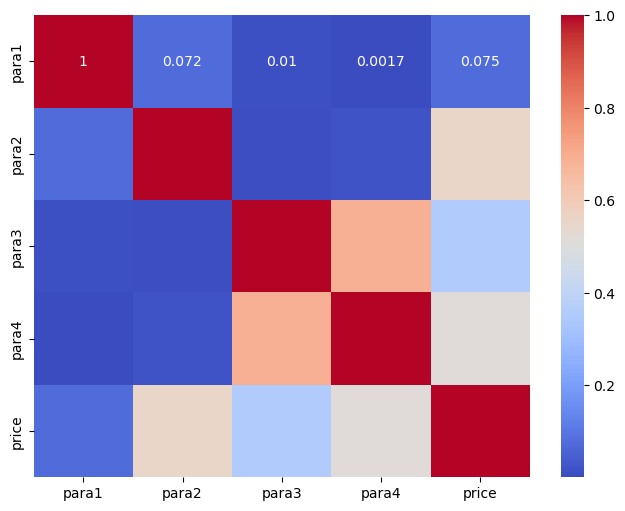

In [30]:
# Heatmap of the correlation matrix for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_numerical, annot=True, cmap='coolwarm')
plt.show()


C:\Users\manoj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manoj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manoj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manoj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

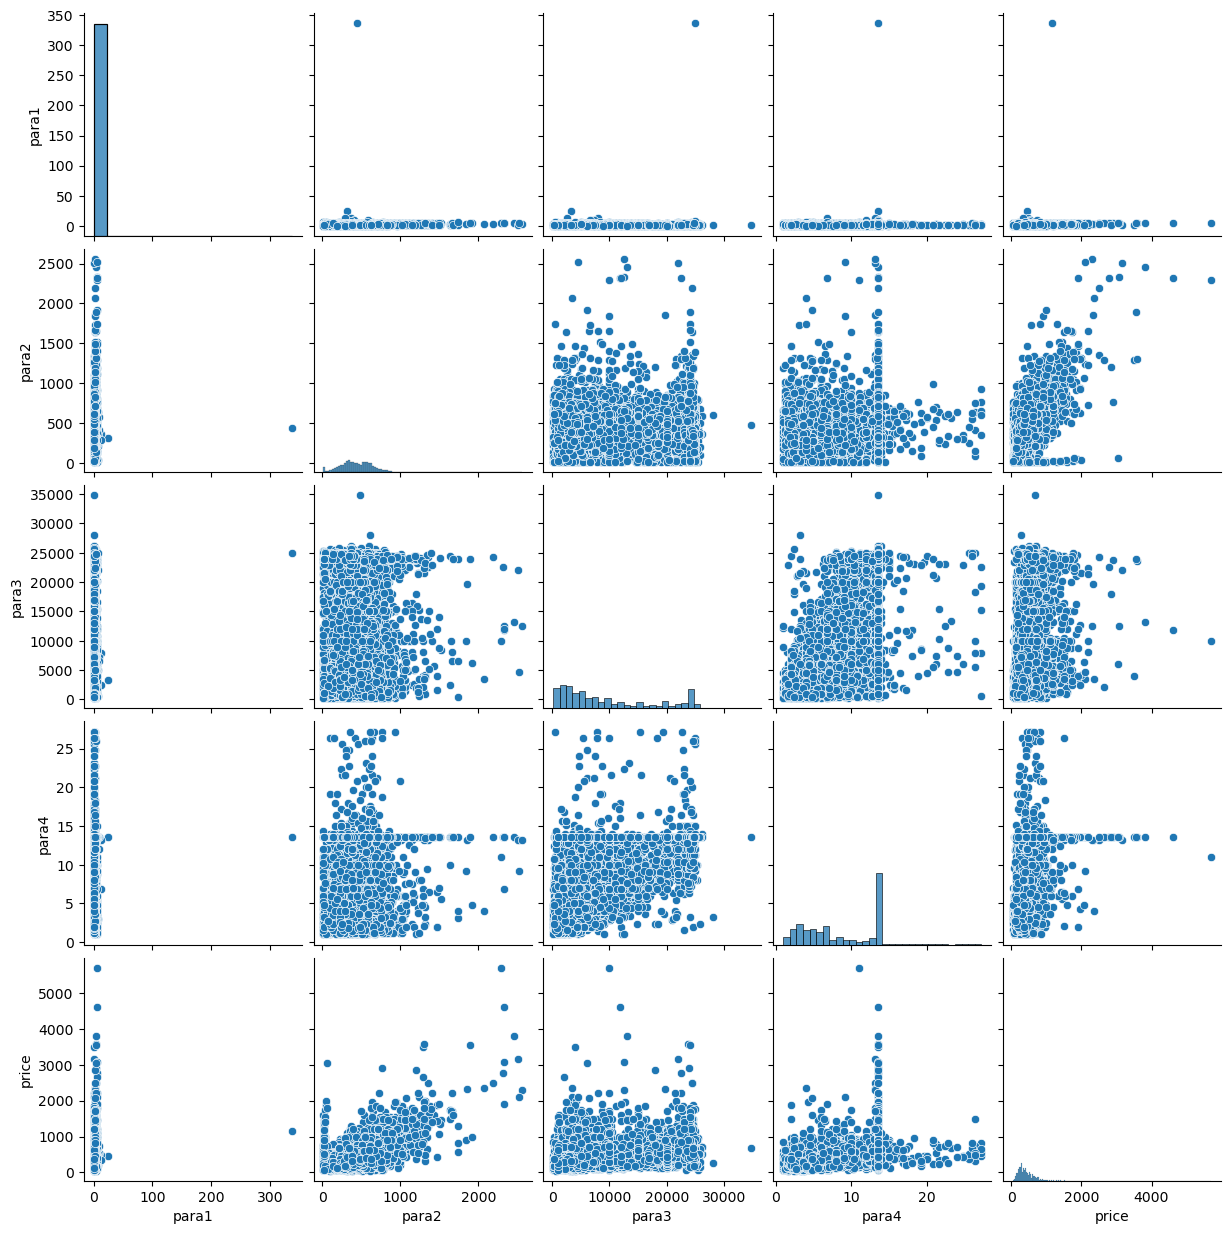

In [31]:
# Pairplot to visualize relationships
sns.pairplot(data)
plt.show()

In [33]:
# Identify categorical and numerical columns
categorical_cols = ['loc1', 'loc2', 'dow']
numerical_cols = ['para1', 'para2', 'para3', 'para4']

# Preprocessing pipelines for both numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Splitting the data into training and testing sets
X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Function to evaluate models using cross-validation
def evaluate_model(model, X, y):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
    return -cv_scores.mean()

# Evaluate each model
for name, model in models.items():
    score = evaluate_model(model, X_train, y_train)
    print(f"{name}: MAE = {score:.2f}")


Linear Regression: MAE = 112.28
Decision Tree: MAE = 117.06
Random Forest: MAE = 88.97


In [36]:
# Select the best model 
best_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a pipeline with the preprocessor and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Define the parameter grid
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation MAE: {best_score:.2f}")

Best parameters: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 300}
Best cross-validation MAE: 88.49


In [37]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print(f"Test MAE with best parameters: {test_mae:.2f}")


Test MAE with best parameters: 95.26


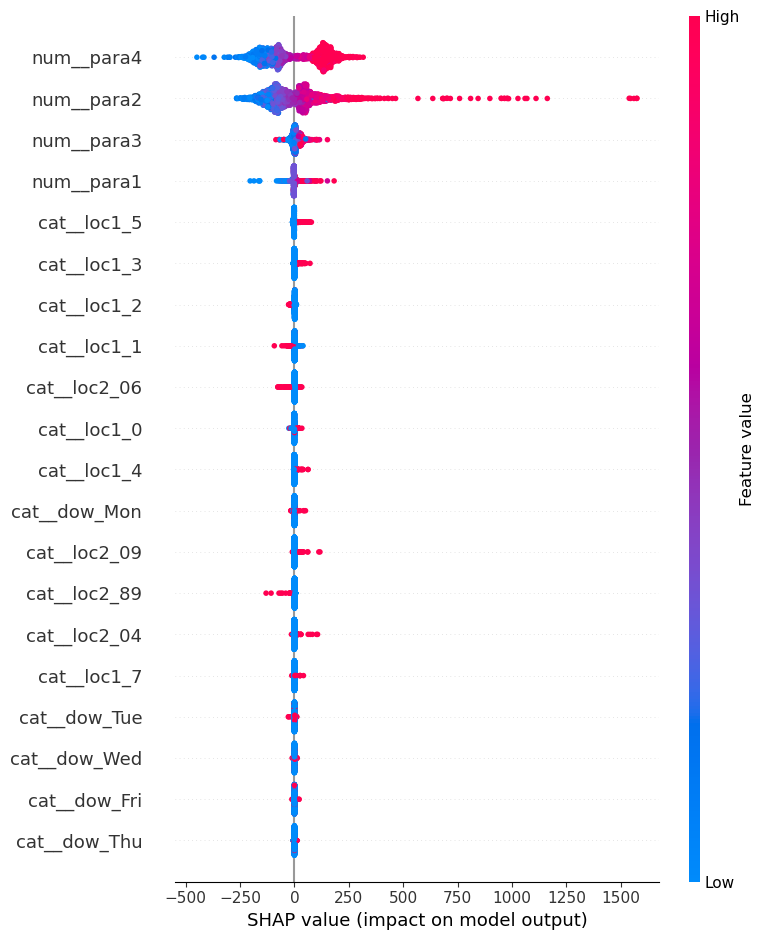

In [44]:
import shap
from scipy import sparse

# Fit the preprocessor on the entire training data
preprocessor.fit(X_train)

# Transform the training and test data
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Convert X_test_preprocessed to a NumPy array if needed
X_test_preprocessed = X_test_preprocessed.toarray() if isinstance(X_test_preprocessed, sparse.csr_matrix) else X_test_preprocessed

# Create SHAP explainer and compute SHAP values
explainer = shap.TreeExplainer(best_model['model'])
shap_values = explainer.shap_values(X_test_preprocessed)

# Plot feature importance
shap.summary_plot(shap_values, X_test_preprocessed, feature_names=preprocessor.get_feature_names_out())